Import the basic libraries

In [1]:
import numpy as np,pandas as pd, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, statsmodels, sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check if thre are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.shape

(730, 16)

Create dummy variables for the categorical data

In [5]:
# Get the dummy variables for the feature 'weekday' and store it in a dataframe - 'day'
day = pd.get_dummies(df['weekday'],prefix='day',drop_first=True)
day.head()

,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [6]:
# Get the dummy variables for the feature 'weathersit' and store it in a dataframe - 'weather'
weather = pd.get_dummies(df['weathersit'],prefix='weathersit',drop_first=True)
weather.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [7]:
# Get the dummy variables for the feature 'season' and store it in a dataframe - 'climate'
df['season']=df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
climate=pd.get_dummies(df['season'],drop_first=True)
climate

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [8]:
#creating dummy for month
month_dummy=pd.get_dummies(df['mnth'],prefix='month',drop_first=True)
month_dummy.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#drop the coulums instant(as it is index),weekdays, season and weathersit(as we have created dummy for this column),
#dteday(not necessary as we have holiday list),casual,registered,
df=df.drop(['instant','dteday','weekday','weathersit','season','mnth','casual', 'registered'],axis=1)

In [10]:
#now drop the actual column for which the dummy have been created and concat the dummy dataframe with original one
df=pd.concat([df,day,weather,climate,month_dummy],axis=1)

In [11]:
#check the ststistics of present dataframe
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_1,day_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'weathersit_2', 'weathersit_3', 'spring', 'summer', 'winter', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

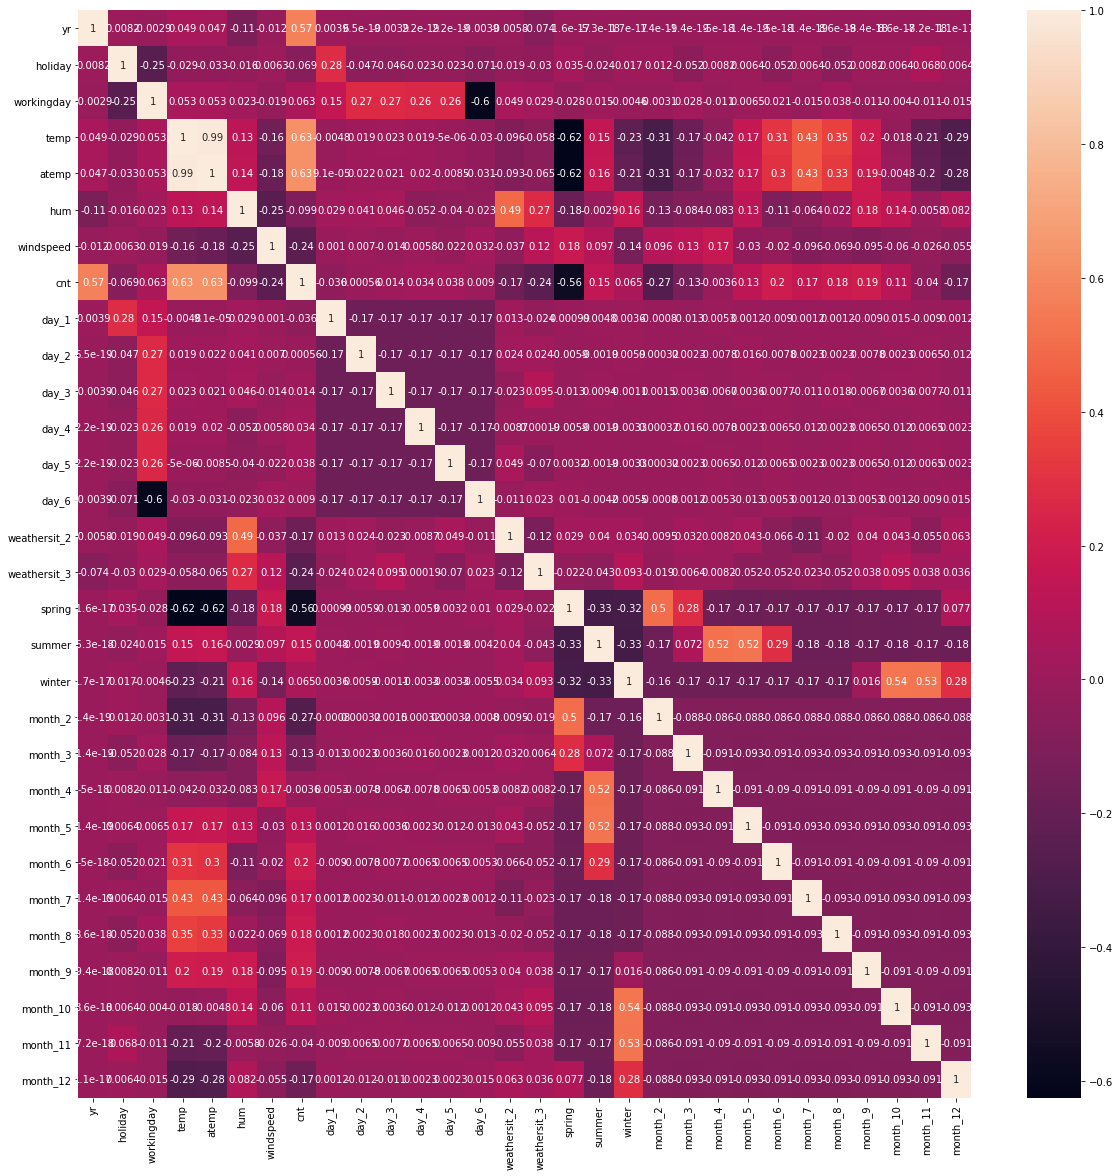

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)

In [14]:
#Split the dataset into training and test set
from sklearn.model_selection import train_test_split

In [15]:
train,test=train_test_split(df,train_size=0.70,random_state=100)

In [16]:
#rescaling
from sklearn.preprocessing import MinMaxScaler

In [17]:
#create a list of the numerical variables
num=['temp', 'atemp', 'hum', 'windspeed','cnt']
#Instantiate an object then fit it on data
scaler=MinMaxScaler()
#fit on data
train[num]=scaler.fit_transform(train[num])
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_1,day_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,0,0,0,0


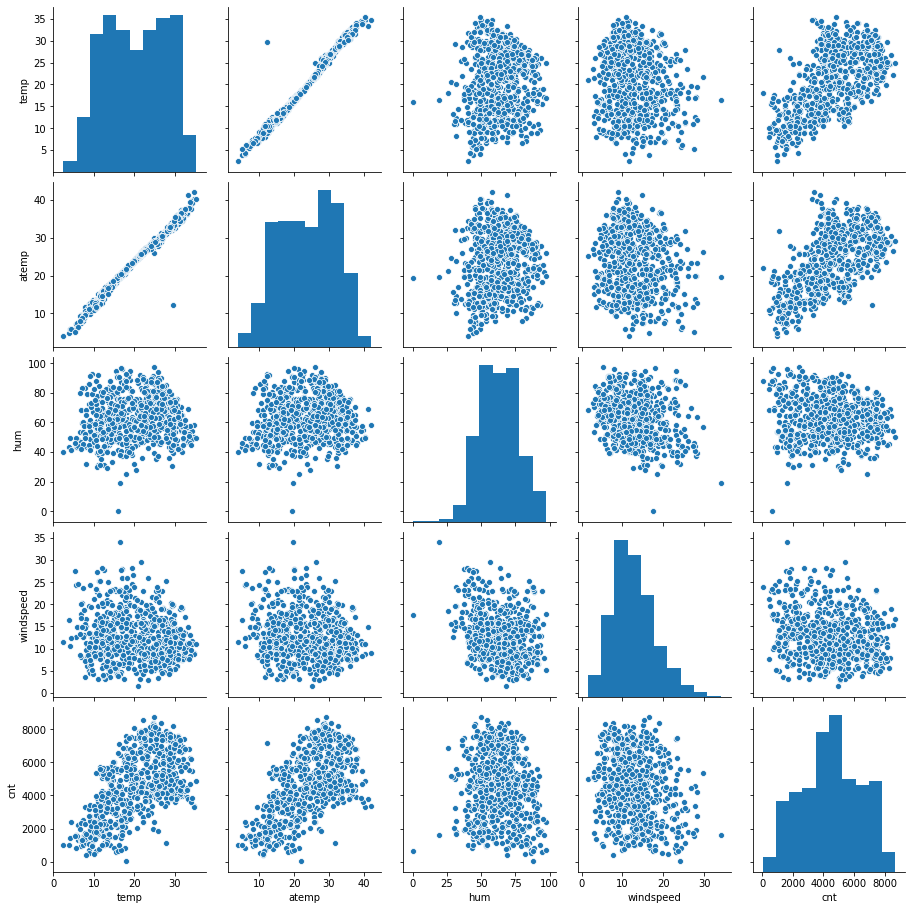

In [18]:
sns.pairplot(df[num])

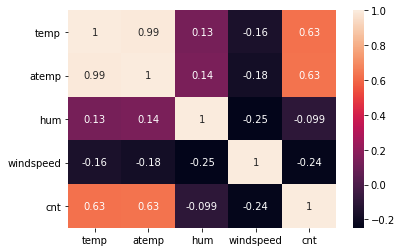

In [19]:
sns.heatmap(df[num].corr(), annot= True)

In [20]:
#Divide the datasets into X and y
y_train=train.pop('cnt')
X_train=train

In [21]:
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


In [22]:
#RFE- Recursive feature elimination
#Import RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [23]:
#run RFE with output variable equal to 18
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,18)
rfe=rfe.fit(X_train,y_train)

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day_1', True, 1),
 ('day_2', True, 1),
 ('day_3', True, 1),
 ('day_4', True, 1),
 ('day_5', True, 1),
 ('day_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('month_2', False, 10),
 ('month_3', False, 5),
 ('month_4', False, 8),
 ('month_5', False, 6),
 ('month_6', False, 7),
 ('month_7', False, 11),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', False, 2),
 ('month_11', False, 9),
 ('month_12', False, 12)]

In [25]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'weathersit_2',
       'weathersit_3', 'summer', 'winter', 'month_8', 'month_9'],
      dtype='object')

In [26]:
X_train.columns[~rfe.support_]

Index(['atemp', 'spring', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [27]:
#Build models using RFE
X_train_rfe=X_train[col]

In [28]:
#adding constant Variable
X_train_rfe=sm.add_constant(X_train_rfe)

In [29]:
#running the linear model
lr=sm.OLS(y_train,X_train_rfe)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.81e-188
Time:                        23:27:38   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     492   BIC:                            -922.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1861      0.029      6.451      0.000       0.129       0.243
yr               0.2295      0.008     28.530      0.000       0.214       0.245
holiday         -0.0504      0.023     -2.151      0.032      -0.096      -0.004
workingday       0.0444      0.009      4.724      0.000       0.026       0.063
temp             0.5393      0.022     24.756      0.000       0.496       0.582
hum             -0.1635      0.037     -4.394      0.000      -0.237      -0.090
windspeed       -0.1818      0.025     -7.164      0.000      -0.232      -0.132
day_1           -0.0105      0.010     -1.068      0.286      -0.030       0.009
day_2           -0.0085      0.011     -0.761      0.447      -0.030       0.013
day_3            0.0034      0.011      0.326      0.745      -0.017       0.024
day_4           -0.0005      0.011     -0.047      0.963      -0.022       0.021
day_5            0.0101      0.011      0.897      0.370      -0.012       0.032
day_6            0.0520      0.015      3.560      0.000       0.023       0.081
weathersit_2    -0.0573      0.010     -5.486      0.000      -0.078      -0.037
weathersit_3    -0.2427      0.026     -9.273      0.000      -0.294      -0.191
summer           0.1036      0.011      9.615      0.000       0.082       0.125
winter           0.1481      0.011     14.043      0.000       0.127       0.169
month_8          0.0521      0.016      3.227      0.001       0.020       0.084
month_9          0.1192      0.016      7.429      0.000       0.088       0.151
==============================================================================
Omnibus:                       63.234   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.621
Skew:                          -0.666   Prob(JB):                     3.94e-32
Kurtosis:                       5.243   Cond. No.                     1.52e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.66e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
#check significance of variable(p-values)
#check the VIF which shows how colinear a variable wih other variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
#create a dataframe for VIF
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=True)
vif

,features,VIF
1,yr,1.03
6,windspeed,1.18
18,month_9,1.22
14,weathersit_3,1.25
16,winter,1.32
15,summer,1.38
17,month_8,1.44
4,temp,1.54
13,weathersit_2,1.58
12,day_6,1.78


In [32]:
# dropping variables with high P value
X=X_train_rfe.drop('day_4',axis=1)
X_train_rfe=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_rfe)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.9
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.81e-188
Time:                        23:27:38   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     492   BIC:                            -922.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1861      0.029      6.451      0.000       0.129       0.243
yr               0.2295      0.008     28.530      0.000       0.214       0.245
holiday         -0.0509      0.030     -1.711      0.088      -0.109       0.008
workingday       0.0439      0.015      2.894      0.004       0.014       0.074
temp             0.5393      0.022     24.756      0.000       0.496       0.582
hum             -0.1635      0.037     -4.394      0.000      -0.237      -0.090
windspeed       -0.1818      0.025     -7.164      0.000      -0.232      -0.132
day_1           -0.0100      0.015     -0.656      0.512      -0.040       0.020
day_2           -0.0080      0.015     -0.518      0.605      -0.038       0.022
day_3            0.0039      0.015      0.267      0.789      -0.025       0.033
day_5            0.0106      0.016      0.678      0.498      -0.020       0.041
day_6            0.0520      0.015      3.560      0.000       0.023       0.081
weathersit_2    -0.0573      0.010     -5.486      0.000      -0.078      -0.037
weathersit_3    -0.2427      0.026     -9.273      0.000      -0.294      -0.191
summer           0.1036      0.011      9.615      0.000       0.082       0.125
winter           0.1481      0.011     14.043      0.000       0.127       0.169
month_8          0.0521      0.016      3.227      0.001       0.020       0.084
month_9          0.1192      0.016      7.429      0.000       0.088       0.151
==============================================================================
Omnibus:                       63.234   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.621
Skew:                          -0.666   Prob(JB):                     3.94e-32
Kurtosis:                       5.243   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=True)
vif

,features,VIF
1,yr,1.03
6,windspeed,1.18
17,month_9,1.22
13,weathersit_3,1.25
15,winter,1.32
14,summer,1.38
2,holiday,1.40
16,month_8,1.44
4,temp,1.54
12,weathersit_2,1.58


In [34]:
# dropping variables with high P value
X=X_train_rfe.drop('day_3',axis=1)
X_train_rfe=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_rfe)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.10e-189
Time:                        23:27:38   Log-Likelihood:                 517.20
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1858      0.029      6.452      0.000       0.129       0.242
yr               0.2295      0.008     28.559      0.000       0.214       0.245
holiday         -0.0491      0.029     -1.696      0.091      -0.106       0.008
workingday       0.0460      0.013      3.577      0.000       0.021       0.071
temp             0.5393      0.022     24.781      0.000       0.497       0.582
hum             -0.1632      0.037     -4.392      0.000      -0.236      -0.090
windspeed       -0.1818      0.025     -7.171      0.000      -0.232      -0.132
day_1           -0.0121      0.013     -0.931      0.352      -0.037       0.013
day_2           -0.0102      0.013     -0.770      0.442      -0.036       0.016
day_5            0.0084      0.013      0.630      0.529      -0.018       0.035
day_6            0.0520      0.015      3.563      0.000       0.023       0.081
weathersit_2    -0.0573      0.010     -5.488      0.000      -0.078      -0.037
weathersit_3    -0.2426      0.026     -9.278      0.000      -0.294      -0.191
summer           0.1036      0.011      9.635      0.000       0.083       0.125
winter           0.1481      0.011     14.055      0.000       0.127       0.169
month_8          0.0520      0.016      3.229      0.001       0.020       0.084
month_9          0.1192      0.016      7.435      0.000       0.088       0.151
==============================================================================
Omnibus:                       63.523   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.332
Skew:                          -0.669   Prob(JB):                     2.76e-32
Kurtosis:                       5.247   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# dropping variables with high P value
X=X_train_rfe.drop('day_5',axis=1)
X_train_rfe=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_rfe)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          5.41e-190
Time:                        23:27:38   Log-Likelihood:                 517.00
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     494   BIC:                            -934.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1863      0.029      6.472      0.000       0.130       0.243
yr               0.2294      0.008     28.570      0.000       0.214       0.245
holiday         -0.0464      0.029     -1.623      0.105      -0.103       0.010
workingday       0.0486      0.012      3.980      0.000       0.025       0.073
temp             0.5396      0.022     24.815      0.000       0.497       0.582
hum             -0.1640      0.037     -4.420      0.000      -0.237      -0.091
windspeed       -0.1818      0.025     -7.178      0.000      -0.232      -0.132
day_1           -0.0146      0.012     -1.190      0.235      -0.039       0.010
day_2           -0.0127      0.013     -1.017      0.310      -0.037       0.012
day_6            0.0520      0.015      3.564      0.000       0.023       0.081
weathersit_2    -0.0567      0.010     -5.458      0.000      -0.077      -0.036
weathersit_3    -0.2436      0.026     -9.341      0.000      -0.295      -0.192
summer           0.1034      0.011      9.625      0.000       0.082       0.125
winter           0.1480      0.011     14.057      0.000       0.127       0.169
month_8          0.0520      0.016      3.229      0.001       0.020       0.084
month_9          0.1189      0.016      7.423      0.000       0.087       0.150
==============================================================================
Omnibus:                       63.033   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.133
Skew:                          -0.664   Prob(JB):                     5.03e-32
Kurtosis:                       5.240   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# dropping variables with high P value
X=X_train_rfe.drop('day_2',axis=1)
X_train_rfe=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_rfe)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.37e-191
Time:                        23:27:38   Log-Likelihood:                 516.47
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1874      0.029      6.516      0.000       0.131       0.244
yr               0.2294      0.008     28.568      0.000       0.214       0.245
holiday         -0.0488      0.029     -1.711      0.088      -0.105       0.007
workingday       0.0455      0.012      3.847      0.000       0.022       0.069
temp             0.5390      0.022     24.795      0.000       0.496       0.582
hum             -0.1650      0.037     -4.449      0.000      -0.238      -0.092
windspeed       -0.1824      0.025     -7.201      0.000      -0.232      -0.133
day_1           -0.0116      0.012     -0.976      0.330      -0.035       0.012
day_6            0.0519      0.015      3.559      0.000       0.023       0.081
weathersit_2    -0.0566      0.010     -5.442      0.000      -0.077      -0.036
weathersit_3    -0.2422      0.026     -9.301      0.000      -0.293      -0.191
summer           0.1033      0.011      9.614      0.000       0.082       0.124
winter           0.1478      0.011     14.044      0.000       0.127       0.169
month_8          0.0523      0.016      3.244      0.001       0.021       0.084
month_9          0.1193      0.016      7.450      0.000       0.088       0.151
==============================================================================
Omnibus:                       62.594   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.458
Skew:                          -0.655   Prob(JB):                     2.60e-32
Kurtosis:                       5.265   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# dropping variables with high P value
X=X_train_rfe.drop('day_1',axis=1)
X_train_rfe=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_rfe)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.6
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.92e-192
Time:                        23:27:38   Log-Likelihood:                 515.97
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -944.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1883      0.029      6.553      0.000       0.132       0.245
yr               0.2289      0.008     28.563      0.000       0.213       0.245
holiday         -0.0578      0.027     -2.140      0.033      -0.111      -0.005
workingday       0.0431      0.012      3.727      0.000       0.020       0.066
temp             0.5396      0.022     24.834      0.000       0.497       0.582
hum             -0.1664      0.037     -4.490      0.000      -0.239      -0.094
windspeed       -0.1825      0.025     -7.208      0.000      -0.232      -0.133
day_6            0.0518      0.015      3.554      0.000       0.023       0.080
weathersit_2    -0.0564      0.010     -5.425      0.000      -0.077      -0.036
weathersit_3    -0.2417      0.026     -9.284      0.000      -0.293      -0.191
summer           0.1031      0.011      9.599      0.000       0.082       0.124
winter           0.1476      0.011     14.023      0.000       0.127       0.168
month_8          0.0523      0.016      3.249      0.001       0.021       0.084
month_9          0.1196      0.016      7.470      0.000       0.088       0.151
==============================================================================
Omnibus:                       61.945   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.555
Skew:                          -0.647   Prob(JB):                     4.08e-32
Kurtosis:                       5.265   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=True)
vif

,features,VIF
1,yr,1.03
2,holiday,1.16
6,windspeed,1.18
13,month_9,1.21
9,weathersit_3,1.24
11,winter,1.32
10,summer,1.38
12,month_8,1.44
4,temp,1.54
8,weathersit_2,1.56


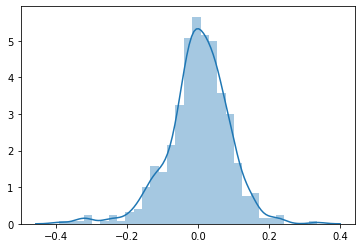

In [39]:
#Calculating Residual
y_train_pred=lr_model.predict(X_train_rfe)
residual=y_train-y_train_pred
sns.distplot(residual)

In [40]:
num=['temp', 'atemp', 'hum', 'windspeed','cnt']
#Scaler has been fit on training dataset so now we only have to transform test dataset
test[num]=scaler.transform(test[num])
test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_1,day_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
y_test=test.pop('cnt')
X_test=test

In [42]:
print(X_test.shape)
print(y_test.shape)

(220, 29)
(220,)


In [43]:
#add a constant to Xtest
X_test= sm.add_constant(X_test)

In [44]:
#drop The columns from X_test
X_test_new=X_test[X_train_rfe.columns]

In [45]:
y_pred=lr_model.predict(X_test_new)

Text(0, 0.5, 'y_pred')

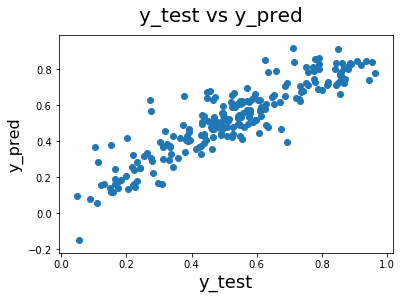

In [46]:
# Model Evaluation
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8084358025167044